In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque

In [7]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit(self, X):
        labels = [0]*len(X)
        C = 0

        for i in range(len(X)):
            if not (labels[i] == 0):
               continue
            
            neighbors = self.range_query(X, i)
            
            if len(neighbors) < self.min_samples:
                labels[i] = -1   
            else: 
                C += 1
                self.grow_cluster(X, labels, i, neighbors, C)
        
        self.labels_ = labels

    def grow_cluster(self, X, labels, i, neighbors, C):
        labels[i] = C
        queue = deque(neighbors)

        while queue:
            j = queue.popleft()
            
            if labels[j] == -1:
                labels[j] = C
            
            if labels[j] == 0:
                labels[j] = C
                new_neighbors = self.range_query(X, j)
                if len(new_neighbors) >= self.min_samples:
                    queue.extend(new_neighbors)

    def range_query(self, X, i):
        return [j for j in range(len(X)) if np.linalg.norm(X[j] - X[i]) <= self.eps]

Load Iris dataset

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)
df = df.drop('class', axis=1)

Initialize and fit DBSCAN

In [9]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(df.values)

Visualize results

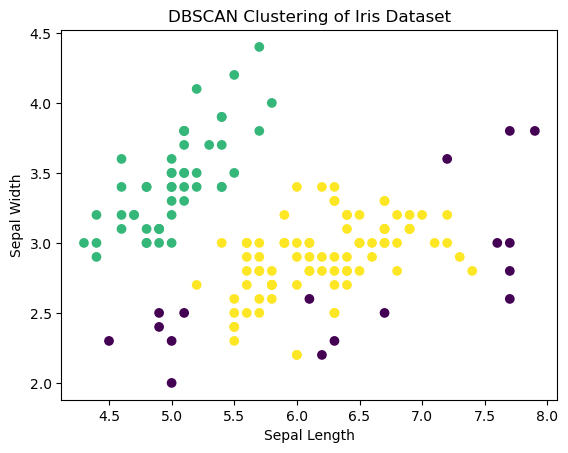

In [10]:
plt.scatter(df['sepal-length'], df['sepal-width'], c=dbscan.labels_)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('DBSCAN Clustering of Iris Dataset')
plt.show()